# Exercício de ajuste linear:
fonte dos dados: https://docs.ufpr.br/~niveam/ce071/lista1.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

Acessando CSV direto do github

In [2]:
url = "https://raw.githubusercontent.com/Eduardo-Barbieri/Data-Science/main/LineReg.csv"
download = requests.get(url).content
dados = pd.read_csv((io.StringIO(download.decode('utf-8'))),sep=';', encoding='ISO-8859-1',nrows=10)

In [3]:
dados.head()

,Peso,Velocidade
0,720,257
1,730,269
2,740,275
3,750,278
4,760,281


# Algoritmo de regressão linear:
obs: genérico sem ultilizar bibliotecas, pode ser aplicado em qualquer situação de python.

In [4]:
class Dataset: #definição do dataset, mantém o conjunto inicial inalterado; 

    def __init__(self): 
        self.pts = []

    def add_pontos(self,x,y):
        self.pts.append([x,y]) #Pega pontos;

class Reta(Dataset):

    def __init__(self): 
        Dataset.__init__(self) #Criando a classe pai;
        self.xmed = float #Media da coordenada x dos pontos;
        self.ymed = float #Media da coordenda y dos pontos;
        self.a = float    #Coeficiente angular;
        self.b = float    #Coeficiente linear;
        self.Sxx = float  #Soma dos quadrados da diferença em x;
        self.Sxy = float  #Soma dos quadrados da diferença em x e y;
        self.Syy = float  #Soma dos quadrados da diferença em y;

    def set_ajuste(self): #Regressão linear propriamente dita ;      
        #pontos medios;
        xmed = 0
        ymed = 0

        for j in range(0,len(self.pts)):
           
            xmed = self.pts[j][0] + xmed #chamando os valores de x;
            ymed = self.pts[j][1] + ymed #Chamando os valores de y;
        
        self.xmed = xmed/len(self.pts) #media em X
        self.ymed = ymed/len(self.pts) #Media em Y

        #Quadrados das diferenças;
        Sxx = 0
        Sxy = 0
        Syy = 0

        n = len(self.pts)
        for j in range(0,len(self.pts)):
            
            Sxx = (self.pts[j][0])**2 - n*(self.xmed**2) + Sxx #Equação do quadrado da diferença em x
            Sxy = (self.pts[j][1]*self.pts[j][0] - n*(self.xmed*self.ymed)) + Sxy #Equação do quadrado da diferença em x e y
            Syy = (self.pts[j][1])**2 - n*(self.ymed**2) + Syy #Equação do quadrado da diferença em y
        
        self.Sxx = Sxx
        self.Sxy = Sxy
        self.Syy = Syy

        #lei da reta
        self.a=(Sxy)/(Sxx) 
        self.b =self.ymed - (self.a*self.xmed)


def Linear_regression(x,y):
   
    z = len(x)
    A = Reta()
    
    for p in range(0,z): #Setar os pontos a partir do DataFrame, não tem necessidade de ser em panda.
        X = x[p] 
        Y = y[p]

        A.add_pontos(X,Y)

    A.set_ajuste()
    return(A)

In [5]:
Reta_ajusted = Linear_regression(dados['Peso'],dados['Velocidade'])

In [6]:
df = pd.DataFrame(columns=[])

for x in range (720,800,10): #Gerando o DataSet da reta ajustada.
    fgen = Reta_ajusted.a*x + Reta_ajusted.b
    df = df.append({'X': x,'Y':fgen},ignore_index=True)

# Configurações dos plots (gráficos):

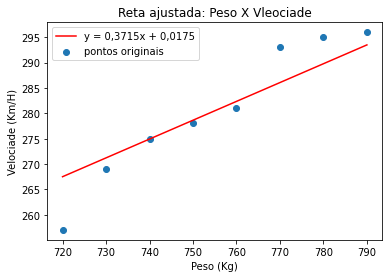

In [7]:
fig1, f1_axes = plt.subplots() #Definido a figura;

#Definindo os eixos:
f1_axes.set_title("Reta ajustada: Peso X Vleociade")
f1_axes.set_xlabel('Peso (Kg)')
f1_axes.set_ylabel('Velociade (Km/H)')

#Definindo os plots:
f1_axes.plot(df['X'],df['Y'], label=f'y = {Reta_ajusted.a}x + {Reta_ajusted.b}', color='red')
f1_axes.scatter(dados['Peso'],dados['Velocidade'], label='pontos originais')
f1_axes.legend()